In [2]:
#Instalando e importando pandas

import pandas

datasetOriginal = pandas.read_csv("logistics_dataset.csv")

print("DATASET ORIGINAL")
# datasetOriginal.head()
datasetOriginal.describe()
# datasetOriginal.info()

DATASET ORIGINAL


,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [3]:
print("Analisis para variables categóricas")

datasetOriginal.nunique().to_frame()

Analisis para variables categóricas


,0
item_id,3204
category,5
stock_level,479
reorder_point,90
reorder_frequency_days,12
lead_time_days,8
daily_demand,2375
demand_std_dev,910
item_popularity_score,91
storage_location_id,100


In [4]:
import matplotlib.pyplot as pyplot
import seaborn as sb
import math
import scipy.stats as stats
import numpy

INTERPRETATION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   stock_level                3204 non-null   int64  
 1   reorder_point              3204 non-null   int64  
 2   reorder_frequency_days     3204 non-null   int64  
 3   lead_time_days             3204 non-null   int64  
 4   daily_demand               3204 non-null   float64
 5   demand_std_dev             3204 non-null   float64
 6   item_popularity_score      3204 non-null   float64
 7   picking_time_seconds       3204 non-null   int64  
 8   handling_cost_per_unit     3204 non-null   float64
 9   unit_price                 3204 non-null   float64
 10  holding_cost_per_unit_day  3204 non-null   float64
 11  stockout_count_last_month  3204 non-null   int64  
 12  order_fulfillment_rate     3204 non-null

<Figure size 1500x1000 with 0 Axes>

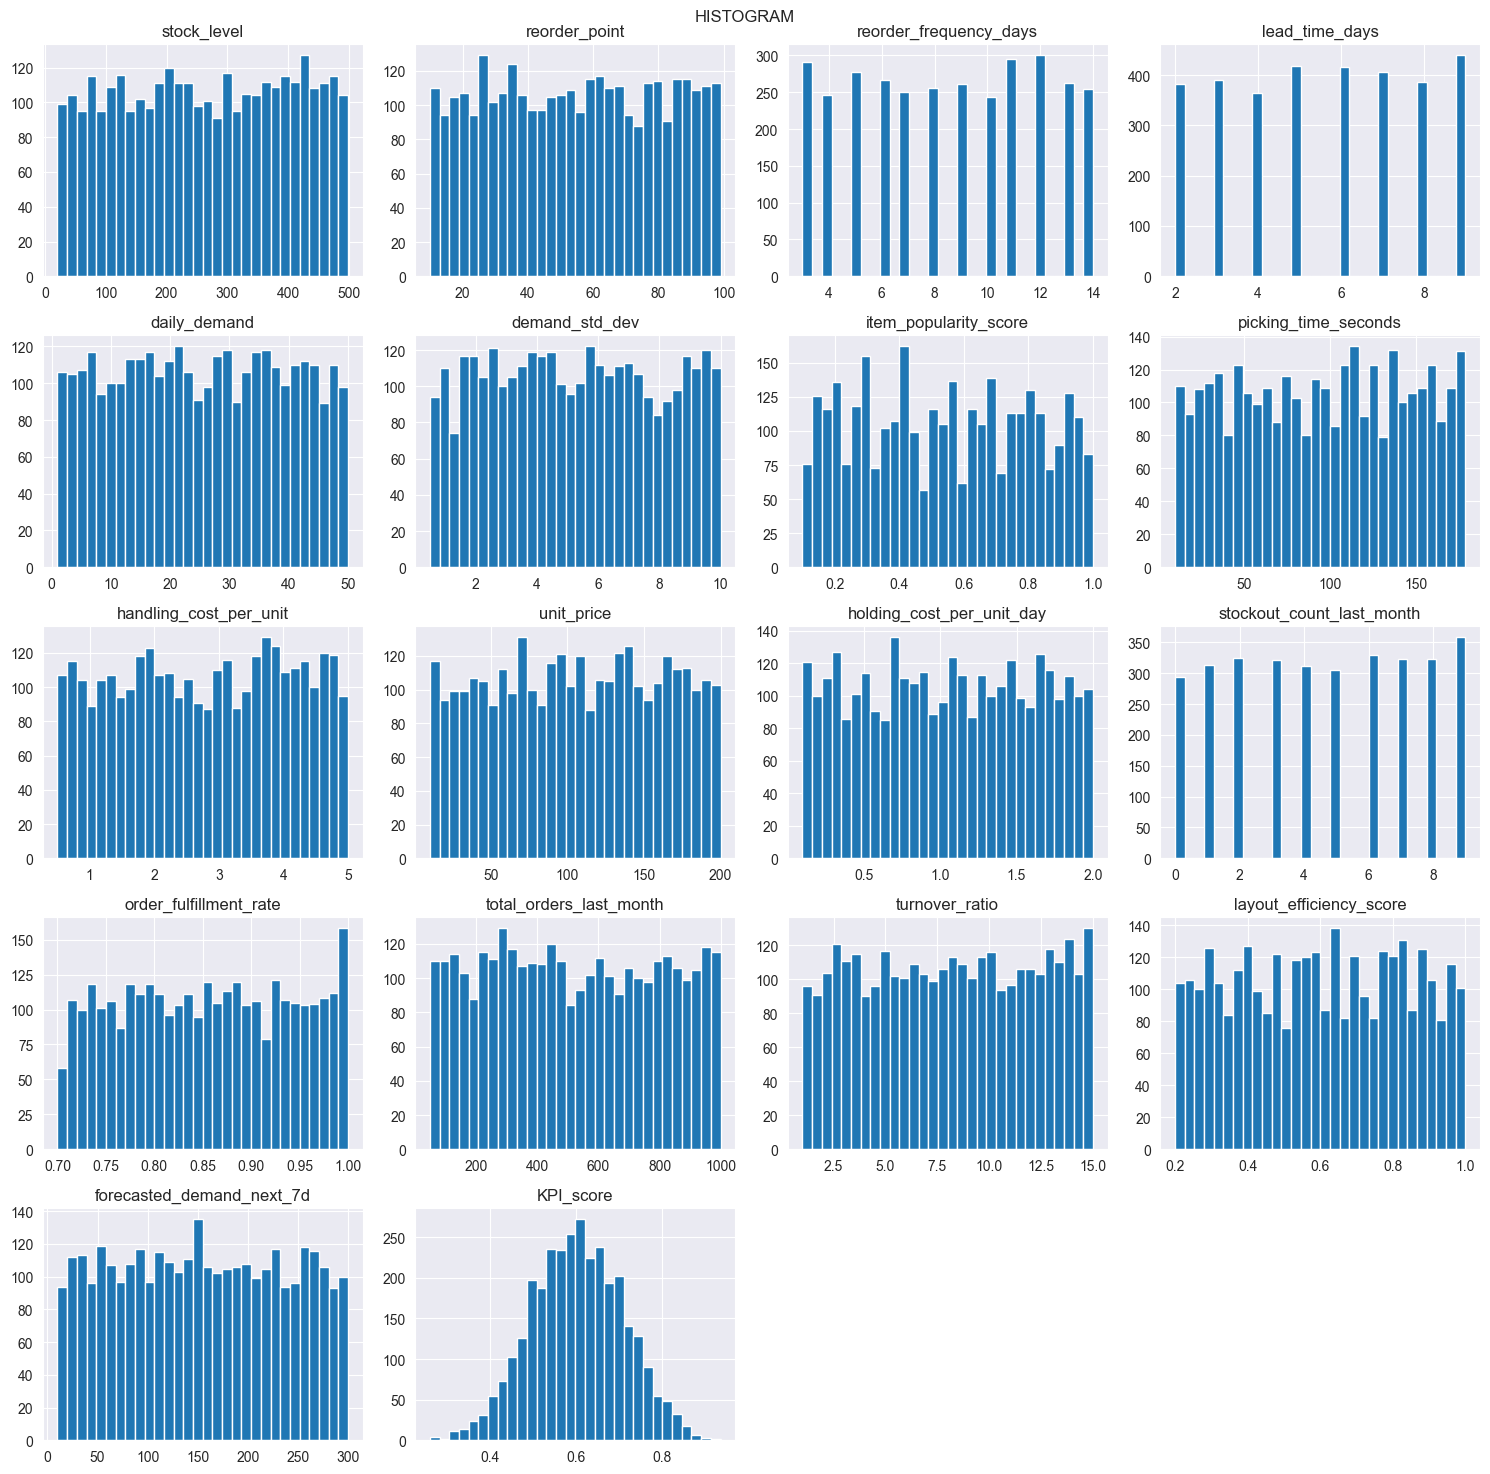

<module 'matplotlib.pyplot' from '/Users/jorgeluisgamboacristancho/PyCharmMiscProject/.venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [5]:
print("INTERPRETATION DE LAS DISTRIBUCIONES DE LAS VARIABLES NUMERICAS")

#HISTOGRAMAS

datasetOriginalNumberColumns = datasetOriginal.select_dtypes(include=[numpy.number])
datasetOriginalNumberColumns.info()

pyplot.figure(figsize=(15,10))
datasetOriginalNumberColumns.hist(bins=30 , figsize=(15,15))
pyplot.suptitle("HISTOGRAM")
pyplot.tight_layout()
pyplot.show()




pyplot

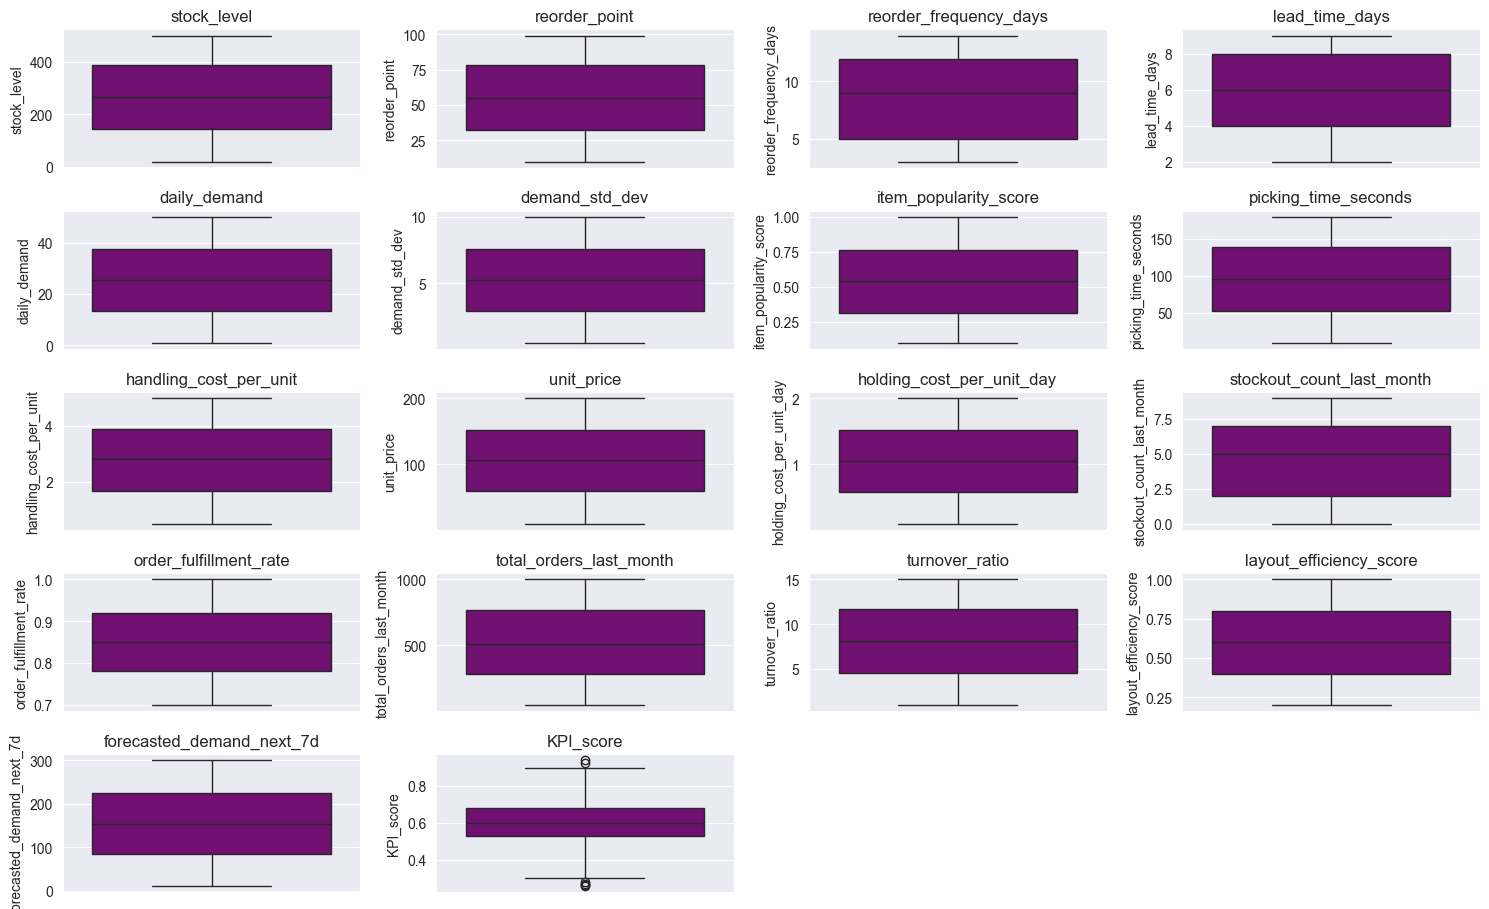

In [6]:
#QQ PLOTS

#DIAGRAMAS DE BIGOTES
numCols = len(datasetOriginalNumberColumns.columns)

cols = 4
rows = math.ceil(numCols/cols)

pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    sb.boxplot(data = datasetOriginalNumberColumns[column], color = 'purple')
    pyplot.title(column)

pyplot.tight_layout(rect=[0,0.03, 1, 0.95])
pyplot.show()

INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS


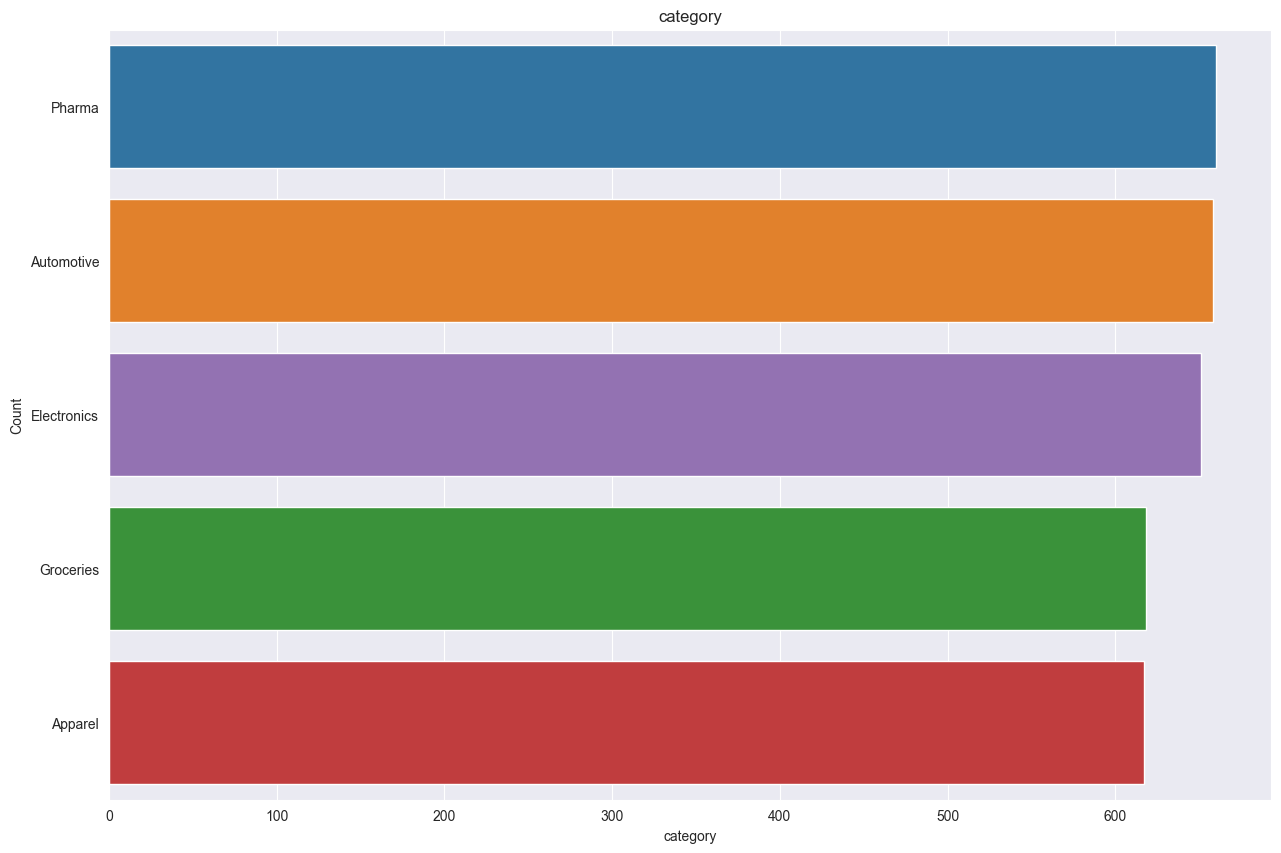

In [7]:
#QQ PLOTS
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS")
datasetOriginalCategoryColumns = datasetOriginal.select_dtypes(exclude=[numpy.number])

# datasetOriginalCategoryColumns.info()
datasetOriginalCategoryColumns.head()

pyplot.figure(figsize=(15,10))
sb.countplot(y = datasetOriginal['category'], data = datasetOriginal,order=datasetOriginal['category'].value_counts().index, hue='category', dodge=False)
pyplot.title('category')
pyplot.xlabel('category')
pyplot.ylabel('Count')
pyplot.show()


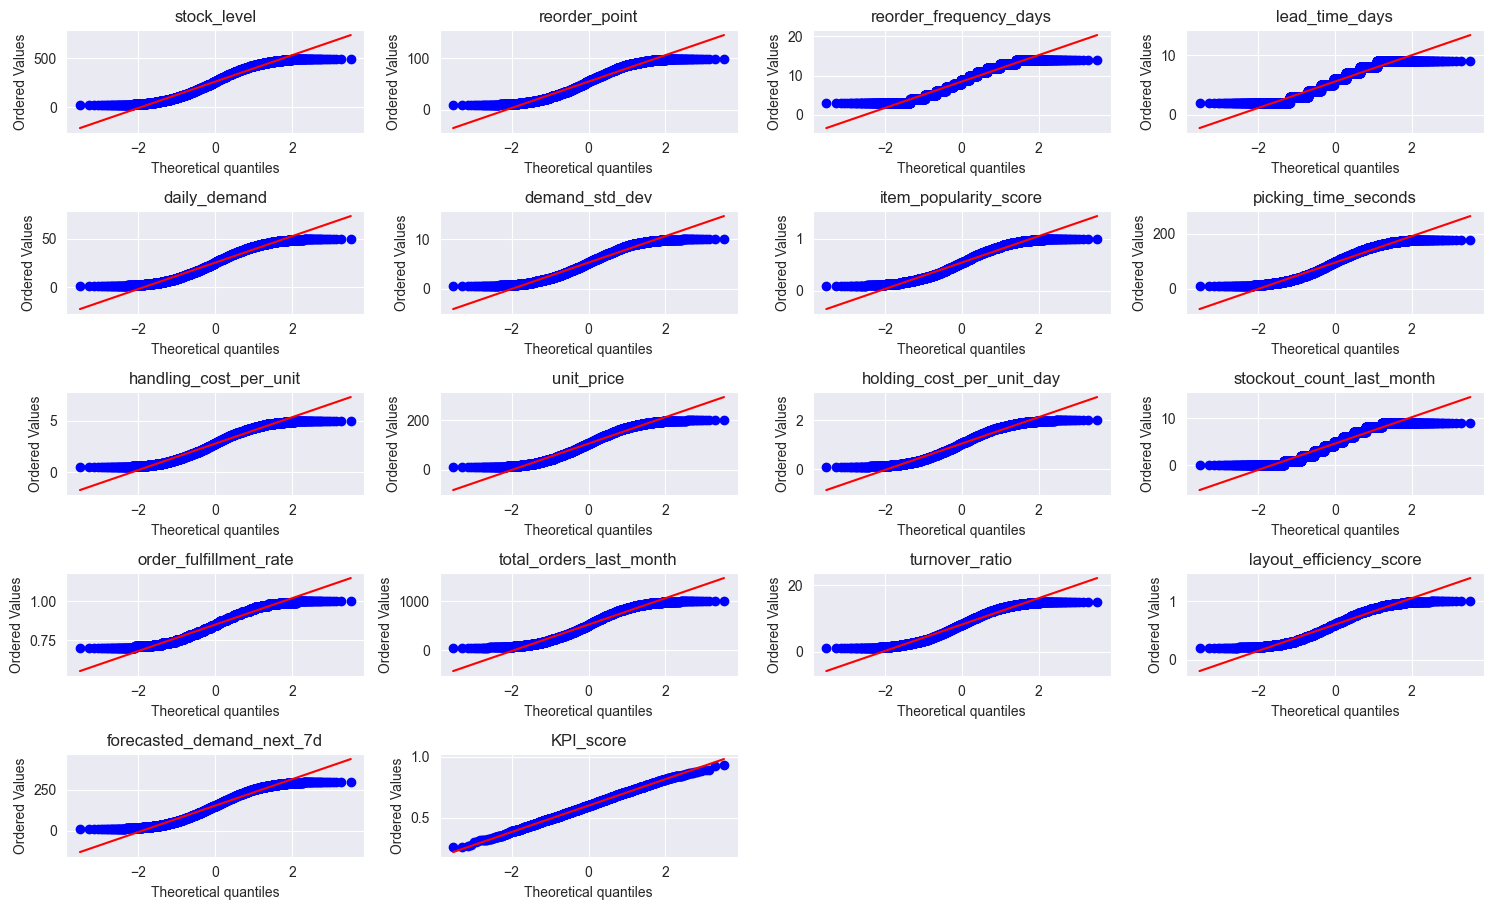

In [8]:
# QQ Plots
numCols = len(datasetOriginalNumberColumns.columns)
cols = 4
rows  = math.ceil(numCols / cols)
pyplot.figure(figsize=(15,10))

for i, column in enumerate(datasetOriginalNumberColumns, 1):
    pyplot.subplot(rows, cols, i)
    stats.probplot(datasetOriginalNumberColumns[column], plot=pyplot, dist="norm")
    pyplot.title(column)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

In [9]:
datasetOriginalCategoryColumns.head()

,item_id,category,storage_location_id,zone,last_restock_date
0,ITM10000,Pharma,L82,B,2024-02-17
1,ITM10001,Automotive,L15,A,2024-10-01
2,ITM10002,Groceries,L4,B,2024-04-07
3,ITM10003,Automotive,L95,A,2024-01-27
4,ITM10004,Automotive,L36,D,2024-05-17


INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS


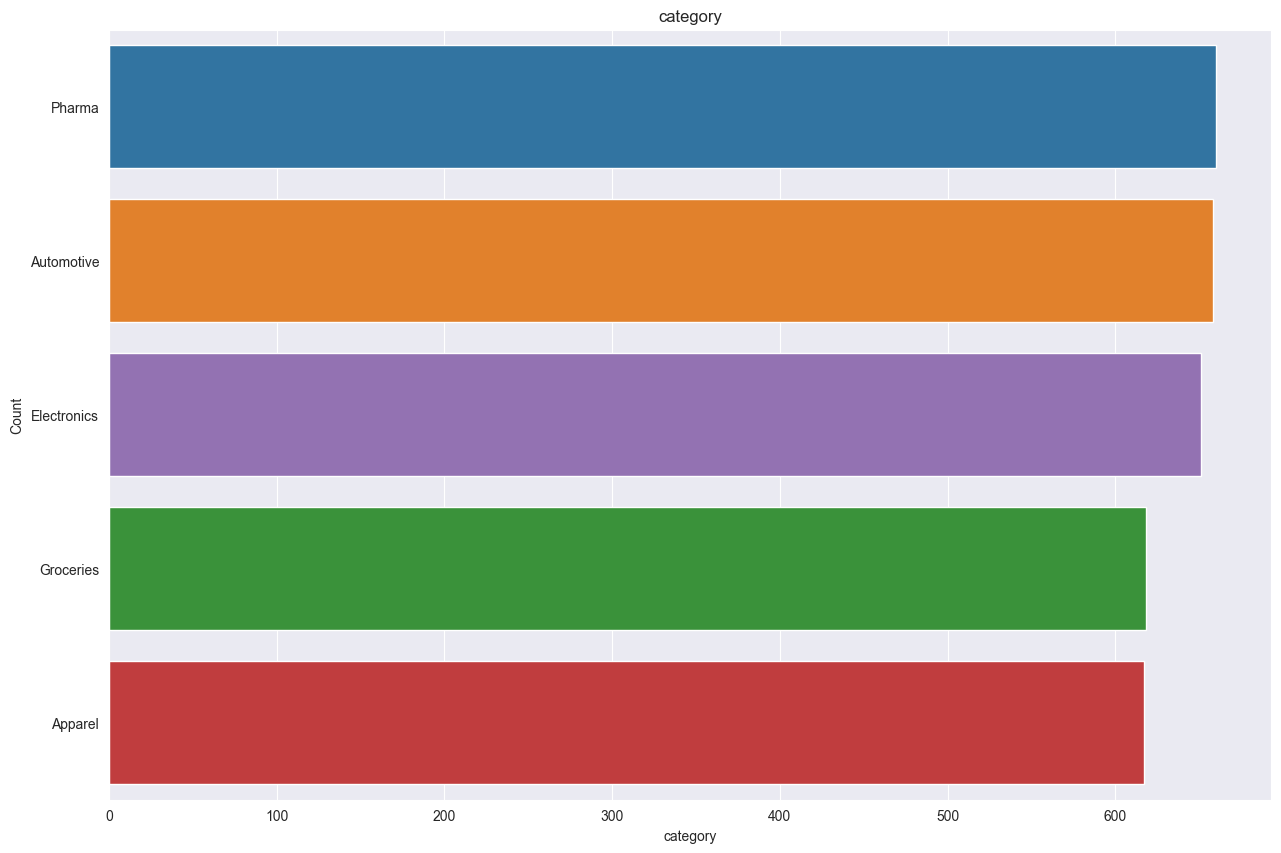

In [10]:
print("INTERPRETACION DE LAS DISTRIBUCIONES DE LAS VARIABLES CATEGORICAS")
datasetOriginalCategoryColumns = datasetOriginal.select_dtypes(exclude=[numpy.number])

# datasetOriginalCategoryColumns.info()
datasetOriginalCategoryColumns.head()

pyplot.figure(figsize=(15,10))
sb.countplot(y = datasetOriginal['category'], data = datasetOriginal,order=datasetOriginal['category'].value_counts().index, hue='category', dodge=False)
pyplot.title('category')
pyplot.xlabel('category')
pyplot.ylabel('Count')
pyplot.show()

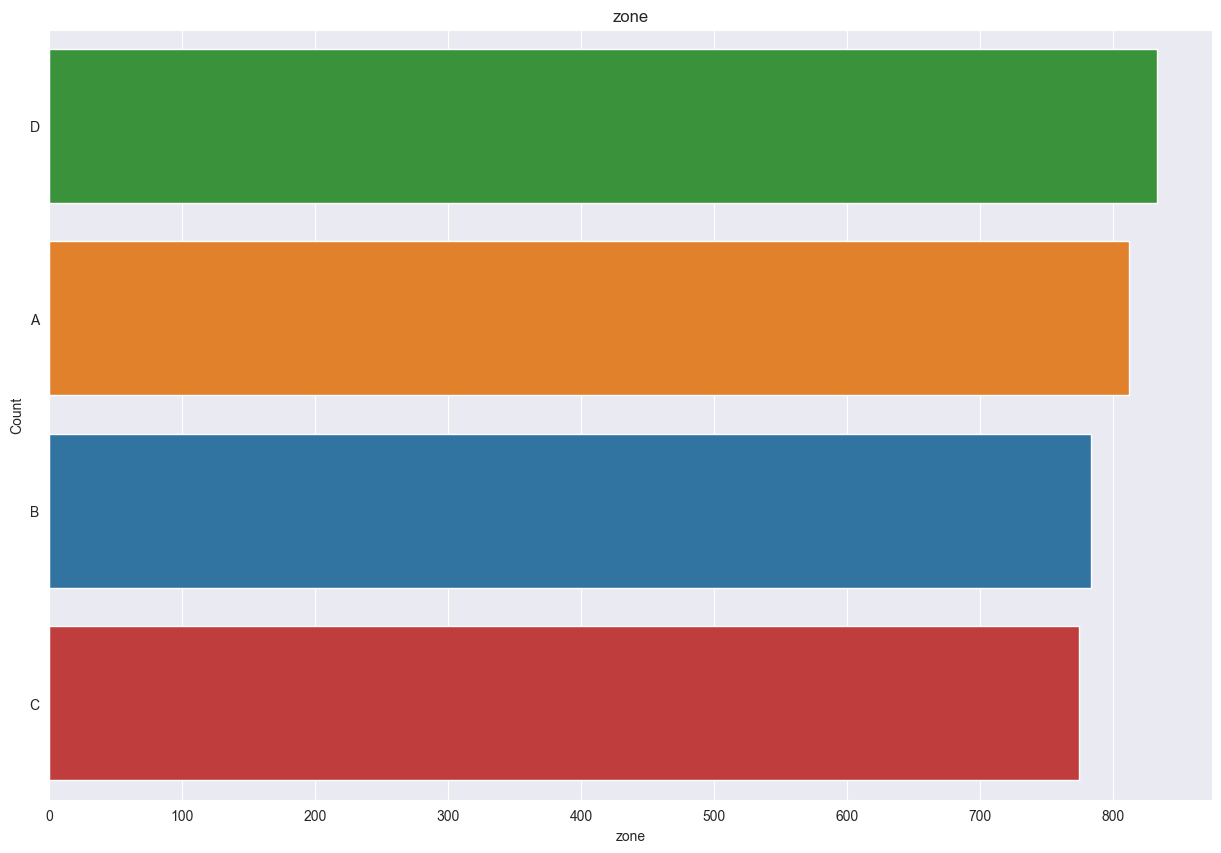

In [11]:
datasetOriginalCategoryColumns.head()
datasetOriginalCategoryColumns = datasetOriginal.select_dtypes(exclude=[numpy.number])
pyplot.figure(figsize=(15,10))
sb.countplot(y = datasetOriginal['zone'], data = datasetOriginal,order=datasetOriginal['zone'].value_counts().index, hue='zone', dodge=False)
pyplot.title('zone')
pyplot.xlabel('zone')
pyplot.ylabel('Count')
pyplot.show()

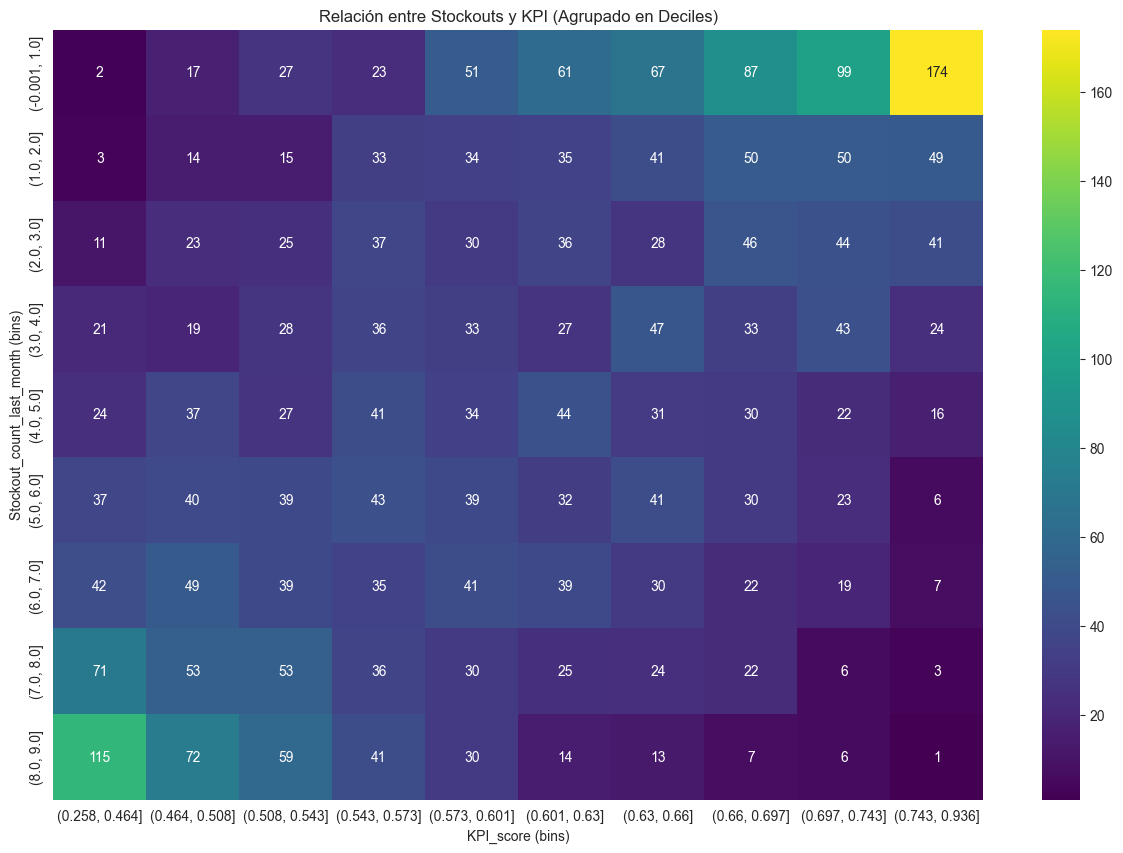

In [12]:
# Agrupar ambas columnas en 10 rangos (deciles)
datasetOriginalNumberColumns['stockout_bin'] = pandas.qcut(datasetOriginalNumberColumns['stockout_count_last_month'], q=10, duplicates='drop')
datasetOriginalNumberColumns['KPI_bin'] = pandas.qcut(datasetOriginalNumberColumns['KPI_score'], q=10)

# Crear la tabla cruzada
cross_table = pandas.crosstab(
    datasetOriginalNumberColumns['stockout_bin'],
    datasetOriginalNumberColumns['KPI_bin']
)

# Graficar el heatmap
pyplot.figure(figsize=(15,10))
sb.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre Stockouts y KPI (Agrupado en Deciles)')
pyplot.xlabel('KPI_score (bins)')
pyplot.ylabel('Stockout_count_last_month (bins)')
pyplot.show()

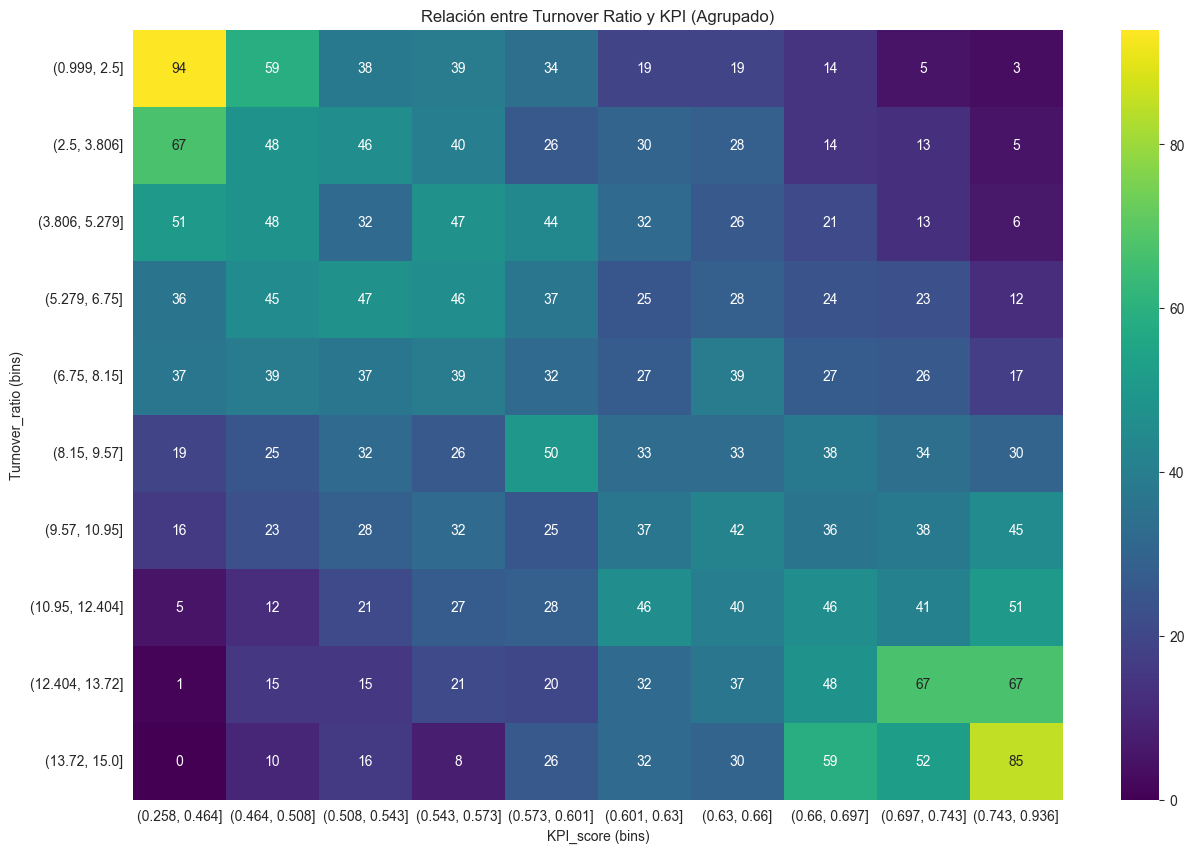

In [13]:
# Crear intervalos (bins)
datasetOriginalNumberColumns['turnover_bin'] = pandas.qcut(datasetOriginalNumberColumns['turnover_ratio'], q=10)
datasetOriginalNumberColumns['KPI_bin'] = pandas.qcut(datasetOriginalNumberColumns['KPI_score'], q=10)

# Generar tabla cruzada
cross_table = pandas.crosstab(datasetOriginalNumberColumns['turnover_bin'], datasetOriginalNumberColumns['KPI_bin'])

# Graficar
pyplot.figure(figsize=(15,10))
sb.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre Turnover Ratio y KPI (Agrupado)')
pyplot.xlabel('KPI_score (bins)')
pyplot.ylabel('Turnover_ratio (bins)')
pyplot.show()

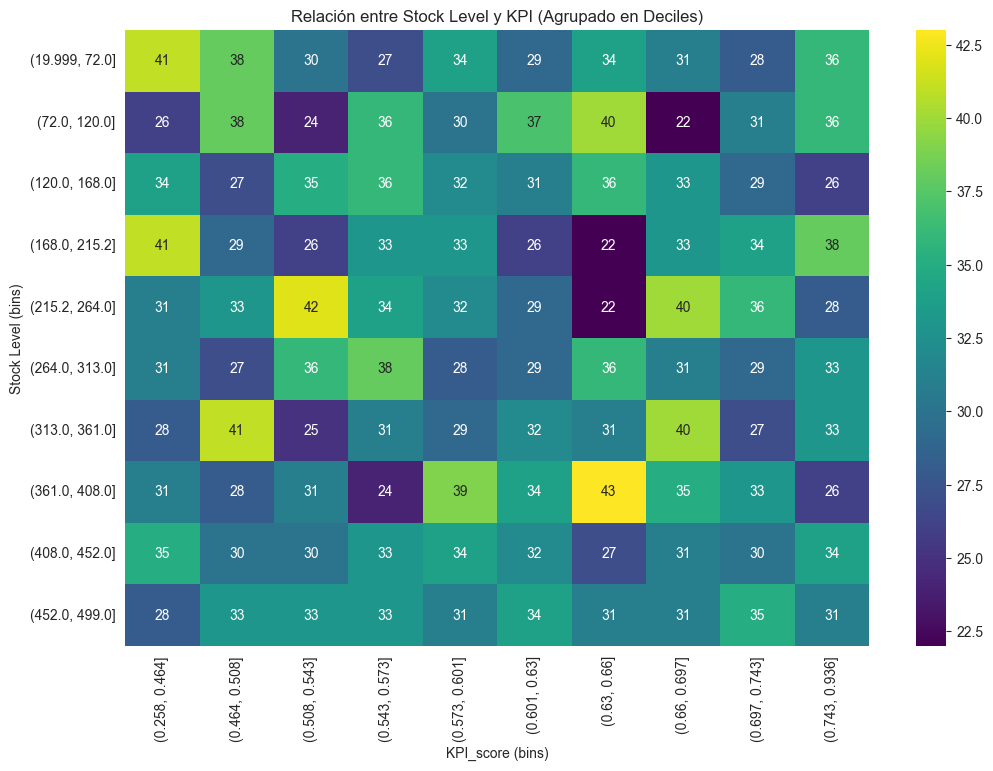

In [14]:
 #Discretizamos ambas columnas
datasetOriginalNumberColumns['stock_level_bin'] = pandas.qcut(datasetOriginalNumberColumns['stock_level'], q=10)
datasetOriginalNumberColumns['KPI_score_bin'] = pandas.qcut(datasetOriginalNumberColumns['KPI_score'], q=10)

# Tabla cruzada entre los intervalos
cross_table = pandas.crosstab(datasetOriginalNumberColumns['stock_level_bin'], datasetOriginalNumberColumns['KPI_score_bin'])

# Graficamos
pyplot.figure(figsize=(12,8))
sb.heatmap(cross_table, annot=True, fmt='d', cmap='viridis')
pyplot.title('Relación entre Stock Level y KPI (Agrupado en Deciles)')
pyplot.xlabel('KPI_score (bins)')
pyplot.ylabel('Stock Level (bins)')
pyplot.show()

In [15]:
# revisión de datos faltantes
datasetOriginal.isnull().sum()

item_id                      0
category                     0
stock_level                  0
reorder_point                0
reorder_frequency_days       0
lead_time_days               0
daily_demand                 0
demand_std_dev               0
item_popularity_score        0
storage_location_id          0
zone                         0
picking_time_seconds         0
handling_cost_per_unit       0
unit_price                   0
holding_cost_per_unit_day    0
stockout_count_last_month    0
order_fulfillment_rate       0
total_orders_last_month      0
turnover_ratio               0
layout_efficiency_score      0
last_restock_date            0
forecasted_demand_next_7d    0
KPI_score                    0
dtype: int64

In [16]:
print("IDENTIFICACIÓN DE VALORES NULOS POR PORCENTAJE")
totalrows= len(datasetOriginal)
missingPercentage= datasetOriginal.isnull().sum() / totalrows*100
print (missingPercentage)

IDENTIFICACIÓN DE VALORES NULOS POR PORCENTAJE
item_id                      0.0
category                     0.0
stock_level                  0.0
reorder_point                0.0
reorder_frequency_days       0.0
lead_time_days               0.0
daily_demand                 0.0
demand_std_dev               0.0
item_popularity_score        0.0
storage_location_id          0.0
zone                         0.0
picking_time_seconds         0.0
handling_cost_per_unit       0.0
unit_price                   0.0
holding_cost_per_unit_day    0.0
stockout_count_last_month    0.0
order_fulfillment_rate       0.0
total_orders_last_month      0.0
turnover_ratio               0.0
layout_efficiency_score      0.0
last_restock_date            0.0
forecasted_demand_next_7d    0.0
KPI_score                    0.0
dtype: float64


revisión gráfica valores nulos


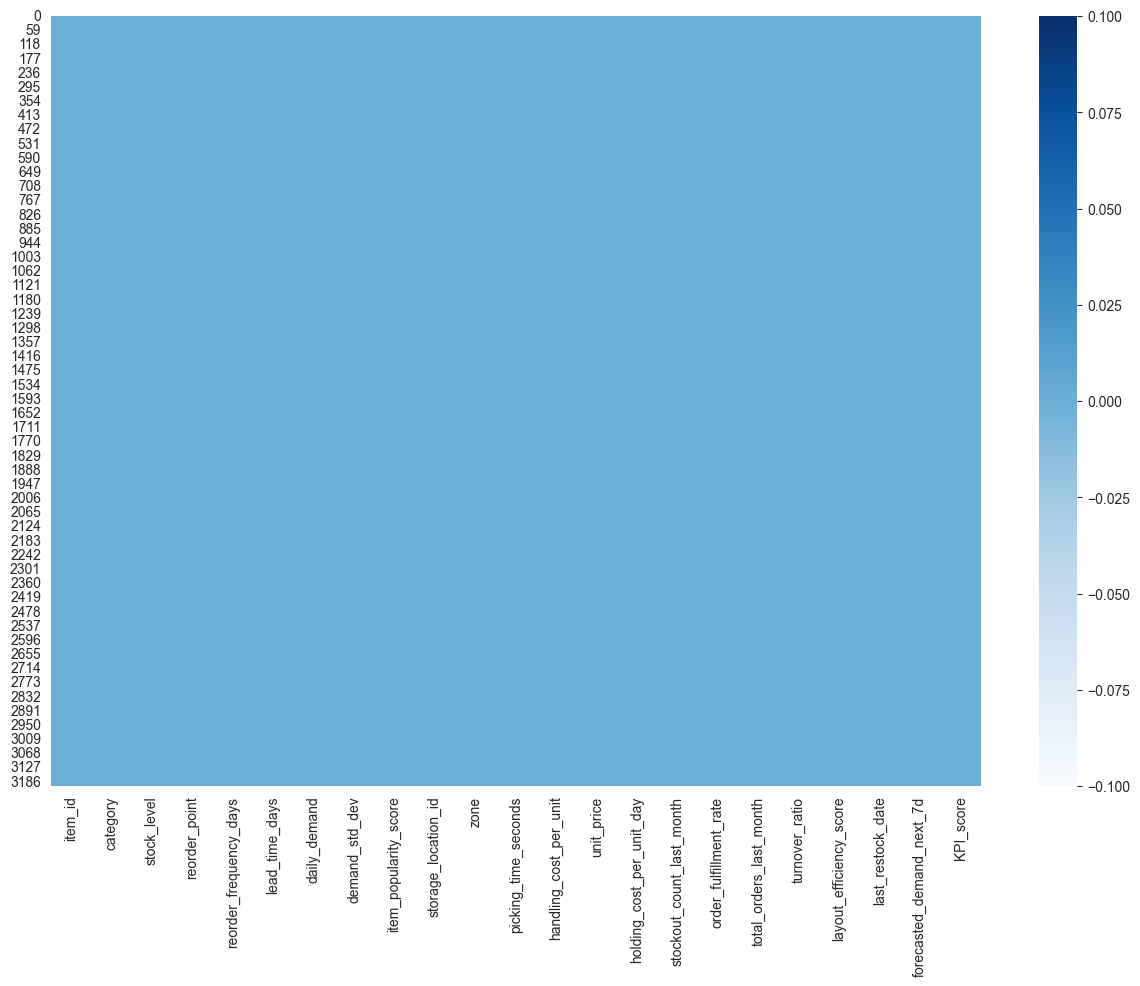

In [17]:
print("revisión gráfica valores nulos")
pyplot.figure(figsize=(15,10))
sb.heatmap(datasetOriginal.isnull(), annot=False, fmt='d', cmap='Blues')
pyplot.show()

In [18]:
#Revisión datos faltantes
#manejo de datos faltantes
datasetOriginalclean=datasetOriginal.copy()
datasetOriginalclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

In [19]:
#eliminar filas que contengan valores nulos o faltantes
datasetOriginalclean = datasetOriginal.dropna()

In [20]:
# # eliminar filas con valores nulos en una columna especifica
datasetOriginalcleancolumns = datasetOriginalclean.dropna(subset=['category'])
# print(datasetOriginalcleancolumns)

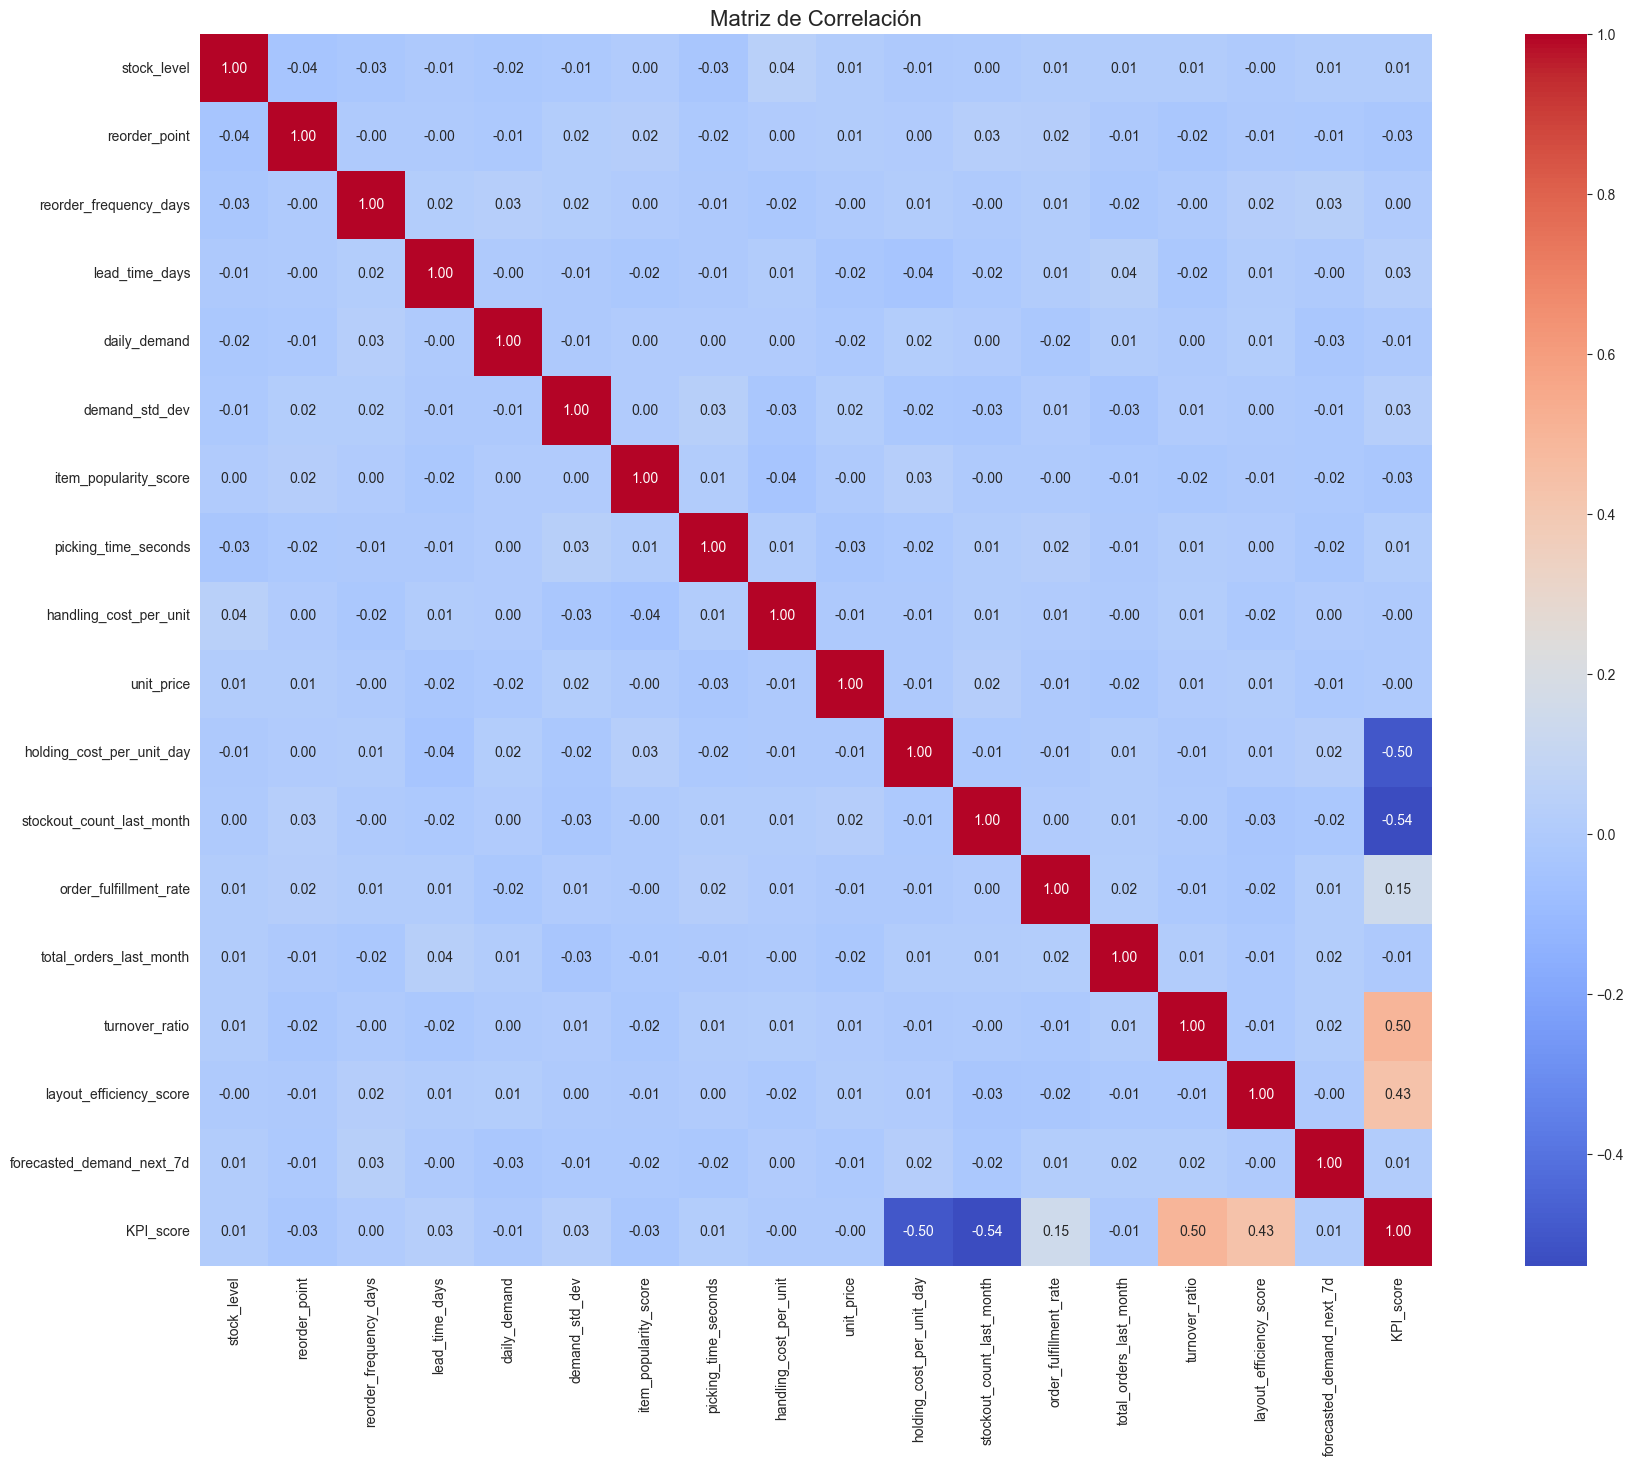

In [21]:
# Generar matriz de correlación
numeric_df = datasetOriginalclean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
pyplot.figure(figsize=(24, 16))
sb.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
pyplot.title('Matriz de Correlación', fontsize=16)
pyplot.show()

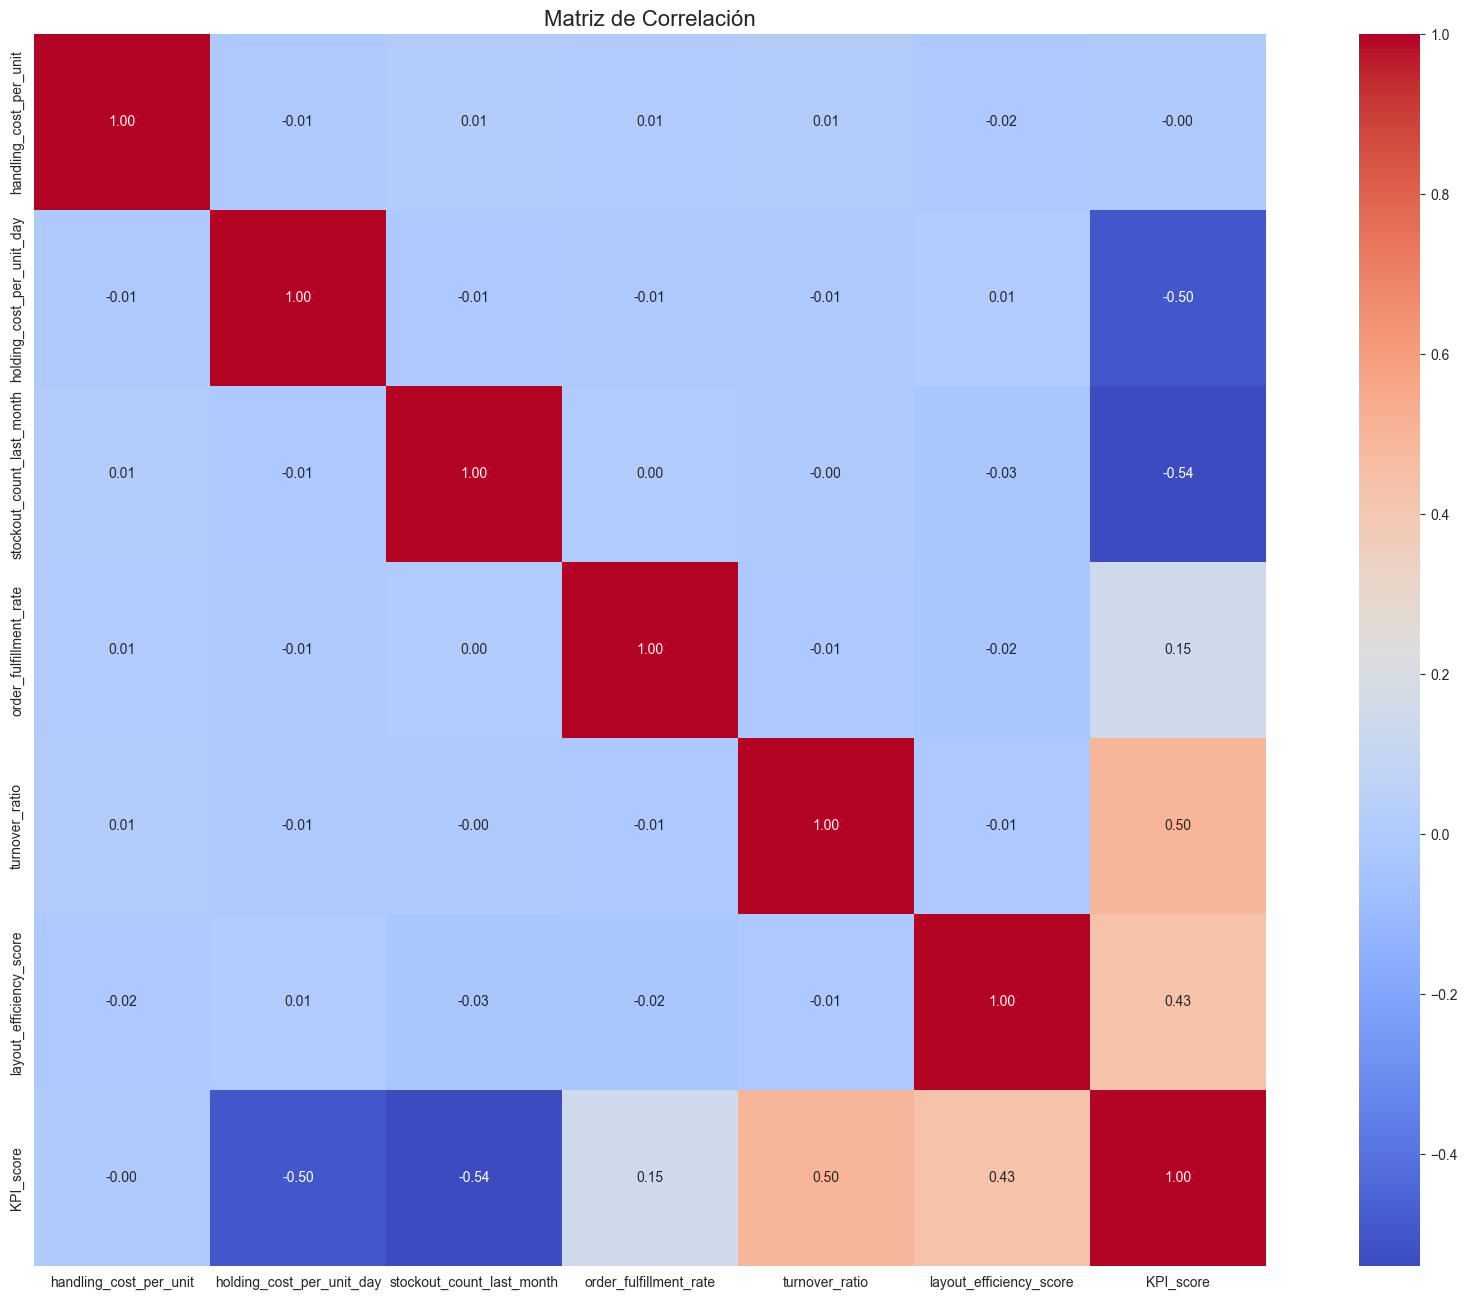

In [26]:
# Limipieza matriz de correlación
datasetOriginalMatriz = datasetOriginalcleancolumns.drop(columns = ['stock_level', 'reorder_point', 'reorder_frequency_days', 'lead_time_days', 'daily_demand', 'demand_std_dev', 'item_popularity_score', 'picking_time_seconds', 'unit_price', 'total_orders_last_month', 'forecasted_demand_next_7d'])

numeric_df = datasetOriginalMatriz.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
pyplot.figure(figsize=(24, 16))
sb.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
pyplot.title('Matriz de Correlación', fontsize=16)
pyplot.show()

#Creando informe EDA con la libreria de pandas

In [ ]:
from ydata_profiling import ProfileReport
# Crear el informe EDA
profile = ProfileReport(
    datasetOriginal,
    title="Informe de Análisis Exploratorio de Datos",
    explorative=True
)

# Exportar a HTML
profile.to_file("informe_EDA.html")